In [2]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
def create_dataset(datapath):
    #读取dat文件作为聚类数据的数据集
    data = np.loadtxt(datapath)
    X = data[:, 0:]
    #转化X为np.array
    X = np.array(X)
    return X

datapath = './data/clusterData1.10k.dat'
X_train = create_dataset(datapath)
print(X_train.shape)

(10000, 2)


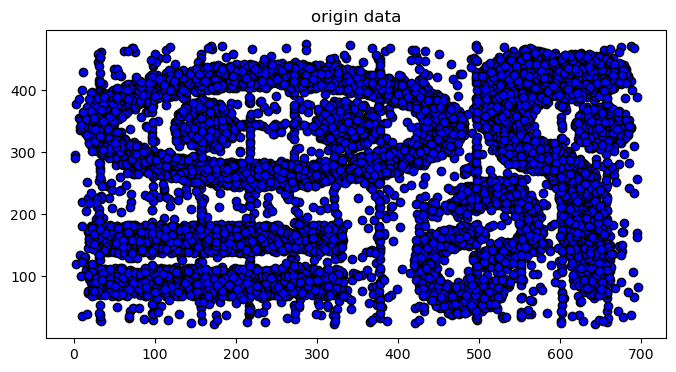

In [6]:
#可视化数据集
def visualize_data(X):
    plt.figure(figsize=(8,4))
    plt.title('origin data')
    plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='datapoints',edgecolors='black')
    plt.show()

visualize_data(X_train)

In [17]:
class KMeans:
    def __init__(self,n_clusters=5,max_iter=1000):
        self._n_clusters=n_clusters
        self._X=None
        self._y=None
        self._center = None
        self._max_iter=max_iter
        
    def fit(self,X):
        self._X=X
        n=X.shape[0]
        d=X.shape[1]
        #随机生成中心点
        self._center = np.array([[np.random.uniform(mi,mx) for mi,mx in zip(X.min(axis=0),X.max(axis=0))] for _ in range(self._n_clusters)])
        step=0
        #迭代
        while step < self._max_iter:
            #求样本点与每个中心点的距离
            distances = np.array([np.sum((X-self._center[i,:])**2,axis=1) for i in range(self._n_clusters)])
            #样本距离哪个最近中心点
            self._y = np.argmin(distances.T,axis=1)
            #对样本点加权平均计算新的中心点
            self._center = np.array([np.mean(X[self._y==i,:],axis=0) for i in range(self._n_clusters)])
            step+=1
        y_pred = np.zeros(n)
        #确定每个点的标签
        for i in range(n):
            best_distance = np.inf
            best_y_pred = 0
            for j in range(self._n_clusters):
                distance = np.sum((X[i,:]-self._center[j,:])**2)
                if distance < best_distance:
                    best_distance = distance
                    best_y_pred = j
            y_pred[i]=best_y_pred
        return y_pred

In [18]:
def visualize(X, y, y_pred, title=None, type='pca'):
    # 可视化,pca降维或者tsne
    if type == 'pca':
        pca = PCA(n_components=2)
        X_dim_reduction = pca.fit_transform(X)

    elif type == 'tsne':
        t_sne = TSNE(n_components=2)
        X_dim_reduction = t_sne.fit_transform(X)
    else:
        X_dim_reduction = X
    # print(X_dim_reduction.shape)
    plt.figure(figsize=(16, 6))

    def get_color(y):
        color_dict = {-1: 'white', 0: 'red', 1: 'orange', 2: 'yellow', 3: 'green', 4: 'magenta', 
                      5: 'blue', 6: 'cyan', 7: 'brown', 8: 'purple', 9: 'aquamarine'}
        color = []
        for i in range(y.shape[0]):
            color.append(color_dict.get(y[i].item(), 'olive'))
        return color
    plt.suptitle(title, fontweight=16)
    plt.subplot(121)
    plt.title('origin data')
    #使用降维后的两个维度进行绘图
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y), edgecolors='black')
    plt.subplot(122)
    plt.title('cluster result')
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y_pred), edgecolors='black')
    plt.show()

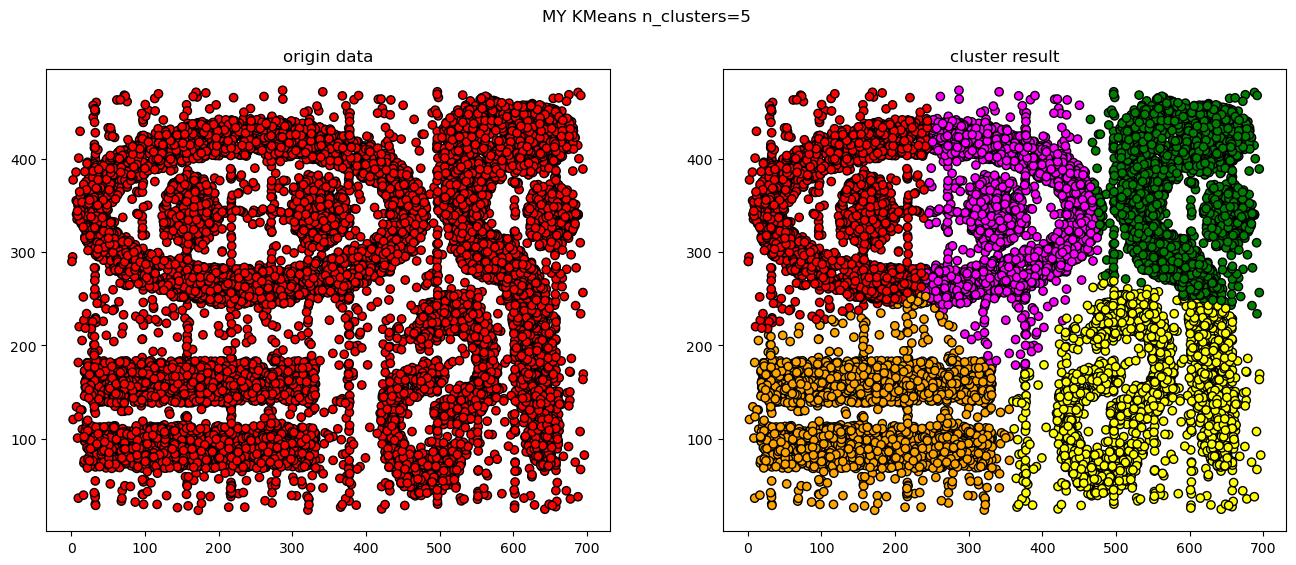

In [20]:
#使用自己实现的KMeans
n_clusters = 5
kmeans = KMeans(n_clusters)
y_pred = kmeans.fit(X_train)
y = np.zeros(X_train.shape[0])
visualize(X_train, y, y_pred, title=f'MY KMeans n_clusters={n_clusters}', type=None)

c:\Users\Delicat\.conda\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


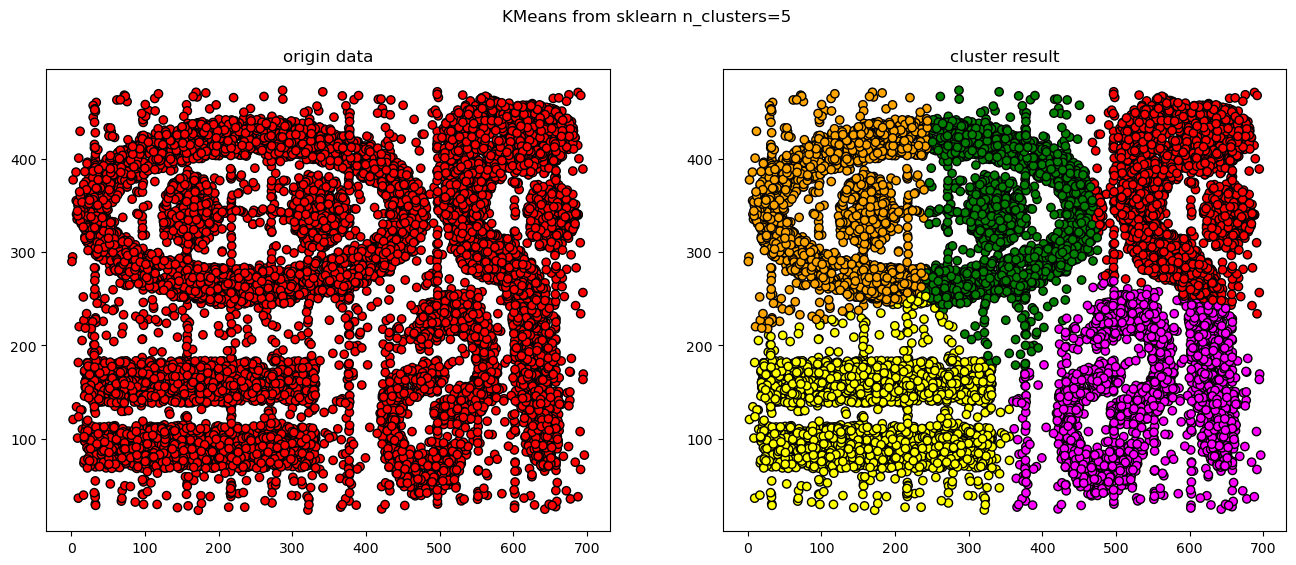

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X_train)
visualize(X_train, y, y_pred, title=f'KMeans from sklearn n_clusters={n_clusters}', type=None)